# Patient Lifestyle Segmentation (Clustering)

--- Patient Segments Detected ---
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           1.952941  141.376471      74.264706      36.447059  205.976471   
1           7.295276  129.677165      78.476378      30.295276  136.031496   
2           2.232558  105.988372      66.962209      24.604651  111.825581   

               BMI       DPF        Age   Outcome  
Cluster                                            
0        39.224118  0.618594  29.329412  0.552941  
1        32.890157  0.454583  45.629921  0.507874  
2        28.788953  0.412140  26.026163  0.130814  


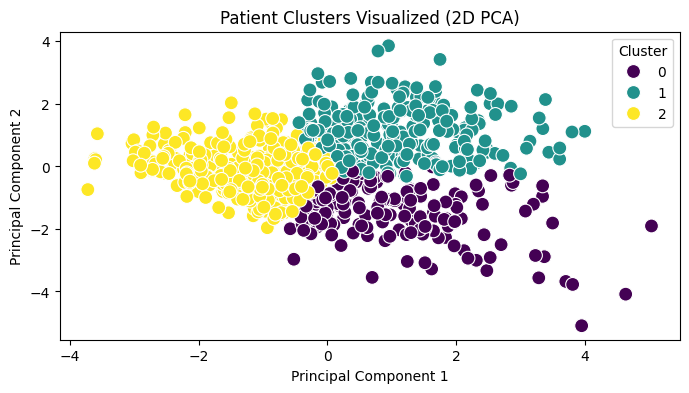

In [1]:
import os
os.chdir(r"C:\Users\User\OneDrive\Documents\Data Science 2025.2026")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. LOAD DATA
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(url, names=col_names)

# Impute missing values (The Pro Move)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
for col in cols_to_fix:
    df[col] = df[col].fillna(df[col].median())

# 2. PREPARE FOR CLUSTERING
# Drop 'Outcome' because Unsupervised Learning doesn't cheat!
X = df.drop('Outcome', axis=1)

# Scale the data (CRITICAL STEP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. APPLY K-MEANS CLUSTERING
# We will ask the model to find 3 distinct groups of patients
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster ID back to our original data so we can see who is who
df['Cluster'] = clusters

# 4. ANALYZE THE GROUPS
# Group by the new 'Cluster' column and see the average stats for each group
print("--- Patient Segments Detected ---")
print(df.groupby('Cluster').mean())

# 5. VISUALIZE WITH PCA
# We can't plot 8 dimensions (Age, BMI, Glucose, etc.), so we use PCA to squash it to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Patient Clusters Visualized (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()